In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import os

batch_size = 128
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20
steps_per_epoch = 1000
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Using TensorFlow backend.


170500096/170498071 [==============================] - 56s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
optimizer = keras.optimizers.SGD(lr=0.05)

In [3]:


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=True,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.1)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    
    datagen.fit(x_train)
    
    # Fit the model on the batches generated by datagen.flow().
    model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data = (x_test, y_test))
    """model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)"""

Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 56s 1ms/step - loss: 2.0082 - acc: 0.2724 - val_loss: 1.6765 - val_acc: 0.4164
Epoch 2/50
50000/50000 [==============================] - 51s 1ms/step - loss: 1.6319 - acc: 0.4180 - val_loss: 1.5345 - val_acc: 0.4655
Epoch 3/50
50000/50000 [==============================] - 51s 1ms/step - loss: 1.4418 - acc: 0.4846 - val_loss: 1.3581 - val_acc: 0.5153
Epoch 4/50
50000/50000 [==============================] - 51s 1ms/step - loss: 1.3227 - acc: 0.5282 - val_loss: 1.2889 - val_acc: 0.5358
Epoch 5/50
50000/50000 [==============================] - 51s 1ms/step - loss: 1.2257 - acc: 0.5664 - val_loss: 1.2076 - val_acc: 0.5672
Epoch 6/50
50000/50000 [==============================] - 51s 1ms/step - loss: 1.1378 - acc: 0.5977 - val_loss: 1.0578 - val_acc: 0.6255
Epoch 7/50
50000/50000 [=====================

In [0]:
#model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data(x_test,y_test))

In [8]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 4s 387us/step
Test loss: 1.058807345867157
Test accuracy: 0.7672


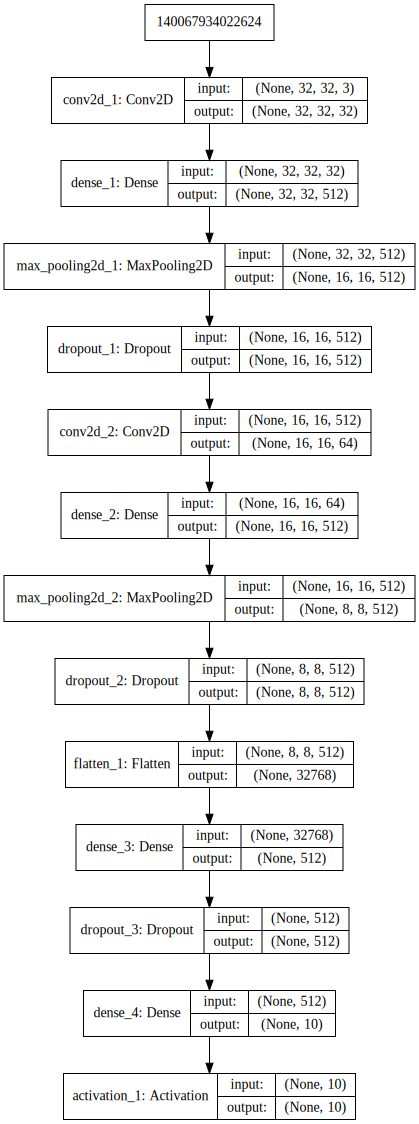

In [6]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

1차 시도 :   
batch_size = 32
steps_per_epoch = 31
epoch = 1000
accuracy :0.62 

2차 시도 :
batch_size = 64
steps_per_epoch = 31
epoch = 1000
accuracy : 0.67

3차 시도 :
batch_size = 255
steps_per_epoch = 31
epoch = 1000
accuracy : 0.74

back propagation 적용


1차 시도
batch_size= 255, steps_per_epoch=31, epoch = 100
accuracy : 0.54?



compile 적용. SGD 사용

2차 시도
batch_size= 255, steps_per_epoch=31, epoch = 100
accuracy : 

batch_size=255, steps_per_epoch=1000, epoch=10
accuracy : 0.70


model.fit() 사용 후
1차 시도 : 정확도 0.89
2차 시도 : 